In [1]:
from tcnRegularization import TCN
import numpy as np
import tensorflow
#from tensorflow.keras import models, optimizers
#from tensorflow.keras.callbacks import TensorBoard
#from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
#import scipy.io as scio
#from tensorflow.keras import backend as K, Model, Input, optimizers
from tensorflow.keras import backend as K, Model, Input, optimizers,regularizers
#from tensorflow.keras import layers
#from tensorflow.keras.layers import Activation, SpatialDropout1D, Lambda
#from tensorflow.keras.layers import Layer, Conv1D, Dense, BatchNormalization, LayerNormalization

Epoch 1/10
600/600 [==============================] - 8s 13ms/step - loss: 0.4917 - accuracy: 0.8503 - val_loss: 0.3485 - val_accuracy: 0.8912
Epoch 2/10
600/600 [==============================] - 7s 12ms/step - loss: 0.1956 - accuracy: 0.9410 - val_loss: 0.2199 - val_accuracy: 0.9330
Epoch 3/10
600/600 [==============================] - 7s 12ms/step - loss: 0.1341 - accuracy: 0.9590 - val_loss: 0.1493 - val_accuracy: 0.9567
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.1055 - accuracy: 0.9672 - val_loss: 0.1730 - val_accuracy: 0.9513
Epoch 5/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0798 - accuracy: 0.9738 - val_loss: 0.1358 - val_accuracy: 0.9605
Epoch 6/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0736 - accuracy: 0.9779 - val_loss: 0.1485 - val_accuracy: 0.9574
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.1485 - val_accuracy: 0.9590

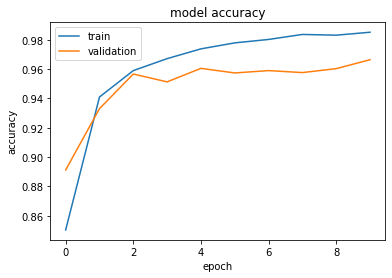

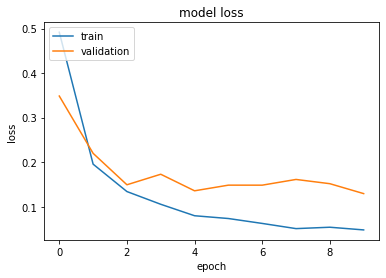

In [2]:
from tensorflow.python import keras

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.Sequential([
    Input(shape=(28, 28)),
    TCN(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.8, epochs=10, batch_size=20, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/10
2400/2400 [==============================] - 13s 6ms/step - loss: 0.3902 - accuracy: 0.9216 - val_loss: 0.2676 - val_accuracy: 0.9584
Epoch 2/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.2261 - accuracy: 0.9663 - val_loss: 0.2294 - val_accuracy: 0.9654
Epoch 3/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1887 - accuracy: 0.9731 - val_loss: 0.1888 - val_accuracy: 0.9732
Epoch 4/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1609 - accuracy: 0.9786 - val_loss: 0.1676 - val_accuracy: 0.9763
Epoch 5/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1457 - accuracy: 0.9815 - val_loss: 0.1584 - val_accuracy: 0.9776
Epoch 6/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1317 - accuracy: 0.9833 - val_loss: 0.1613 - val_accuracy: 0.9768
Epoch 7/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.1221 - accuracy: 0.9842 - val_loss: 0.1416 - val_ac

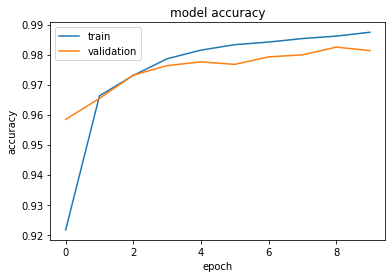

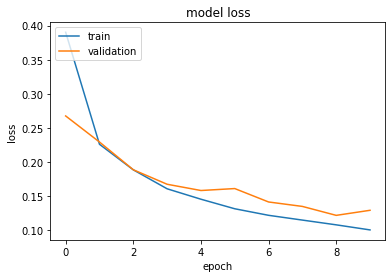

In [3]:
model = keras.Sequential([
    Input(shape=(28, 28)),
    TCN(kernel_regularizer=regularizers.l2(1e-4)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=20, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/10
2400/2400 [==============================] - 13s 6ms/step - loss: 0.9711 - accuracy: 0.9175 - val_loss: 0.6988 - val_accuracy: 0.9625
Epoch 2/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.6011 - accuracy: 0.9647 - val_loss: 0.5210 - val_accuracy: 0.9661
Epoch 3/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.4448 - accuracy: 0.9697 - val_loss: 0.3880 - val_accuracy: 0.9725
Epoch 4/10
2400/2400 [==============================] - 13s 6ms/step - loss: 0.3498 - accuracy: 0.9722 - val_loss: 0.3274 - val_accuracy: 0.9732
Epoch 5/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.2921 - accuracy: 0.9757 - val_loss: 0.2788 - val_accuracy: 0.9756
Epoch 6/10
2400/2400 [==============================] - 13s 6ms/step - loss: 0.2547 - accuracy: 0.9770 - val_loss: 0.2525 - val_accuracy: 0.9760
Epoch 7/10
2400/2400 [==============================] - 13s 5ms/step - loss: 0.2273 - accuracy: 0.9784 - val_loss: 0.2249 - val_ac

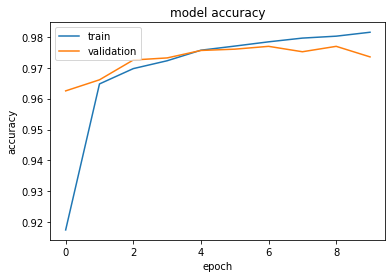

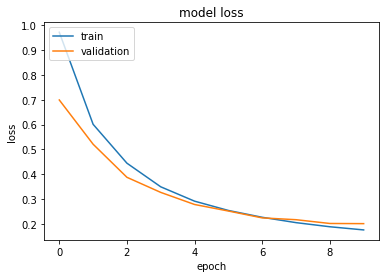

In [4]:
model = keras.Sequential([
    Input(shape=(28, 28)),
    TCN(kernel_regularizer=regularizers.l1(1e-4)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=20, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()